# Introduction - Diffraction Gratings

The thought crossed my mind that perhaps diffraction gratings could somehow be used to help measure myopia. Regardless of whether this actually turns out to be the case I decided I should try to understand them better. What is a diffraction grating, and how does the math work?

At a high level, diffraction gratings are all about making light pass through a filter that repeats itself spatially, in order to create interesting interference patterns. Some examples include:
- Lines cut into glass that block light at regular intervals.
- Repeated slits that allow transmission at regular intervals.
- A semi-transparent filter whose transmission amplitude repeats in a sinusoid pattern.
- A piece of glass whose physical surface is cut into the shape of a sinusoide, causing the phase to shift in a sinusoid pattern.

This notebook focuses on solving cases of Fraunhofer Diffraction, but the solutions are easily transferable to solutions involving lenses. Recall from the Part 4 notebook the equation for amplitude:

$$\psi(\theta_x, \theta_y) = \psi_0 \iint_{-\infty}^{\infty} \psi(\nu_x', \nu_y') \exp{ \left[ -2 \pi i (\theta_x \nu_x' + \theta_y \nu_y') \right] } d\nu_x' d\nu_y' = \psi_0 \mathcal{F} \left[ \psi \left(\nu_x', \nu_y'\right) \right]$$

Where:

$$\begin{align}
\theta_x &= x/z \\
\theta_y &= y/z \\
\nu_x' &= x' / \lambda \\
\nu_y' &= y' / \lambda
\end{align}$$

The high-level strategy is to write the amplitude at the grating as the combination of two terms, one involving the **aperture** and one involving the **grating**. We can solve for the diffraction patterns of each term separately, then combine the results using the Convolution Theorem. Typically the pattern of the **aperture** will look similar to the examples in Part 3 (eg Airy Rings for a circle, sincs for a square, etc.), while the pattern of the **grating** will tend to involve repeated Diract Deltas, since the Fourier Transform of sinusoids are Dirac Deltas. Convolving these will generally result in a **repeated aperture pattern**, since the convolution of a Dirac Delta and any arbitrary function results in a shifting of that function. The angle between the aperture patterns is a function of the spacing of the grating, where smaller gratings result in larger angular separations. Let's walk through a couple examples to see this in action.

## Example 1: Amplitude Oscillation

Suppose we have a square aperture combined with a transmission grating that modulates the amount of light allowed through. The amplitude at the grating is given by the following grating and aperture functions:

$$\psi(\nu_x', \nu_y') = \psi_A(\nu_x', \nu_y') \cdot \psi_G(\nu_x', \nu_y')$$

Where:
$$\begin{align}
\psi_A(\nu_x', \nu_y') &= \text{rect}(\nu_x' / 2 L_\nu) \text{rect}(\nu_y' / 2 L_\nu) \\
\psi_G(\nu_x', \nu_y') &= \frac{1}{2} + \frac{m}{2} \cos(2 \pi f_0 \nu_x')
\end{align}$$

Note that the $\text{rect}(x)$ function is defined as $1$ for $|x| \le 1/2$ and $0$ for $x \gt 1/2$.

As stated earlier, the high-level approach is to use the Convolution Theorem, which states that:

$$\mathcal{F}[f \cdot g] = \mathcal{F}[f] \circledast \mathcal{F}[g]$$

Where $\circledast$ is the convolution operator:

$$\left[ f \circledast g \right](x) = \int_{-\infty}^{\infty} f(t) g(x-t) dt$$

The Convolution Theorem means that we can calculate each FFT separately and convolve the results:

$$\mathcal{F} \left[ \psi(\nu_x', \nu_y') \right] = \mathcal{F} \left[ \psi_G \right] \circledast \mathcal{F} \left[ \psi_A \right] $$

The FFT of a square aperture was derived in part 3:

$$\mathcal{F} \left[ \psi_A \right] = \text{sinc} \left( 2 \pi (L_\nu / 2) \theta_x \right) \cdot \text{sinc} \left( 2 \pi (L_\nu / 2) \theta_y \right)$$

The Fourier Transform of the grating can be calculated easier by first re-expressing it in terms of exponentials:

$$\cos(x) = \frac{1}{2} \left[ e^{ix} + e^{-ix} \right]$$

The grating term becomes:

$$\psi_G(\nu_x', \nu_y') = \frac{1}{2} + \frac{m}{2} \left( e^{2 \pi i f_0 \nu_x'} + e^{-2 \pi i f_0 \nu_x'} \right)$$

Note that $\mathcal{F} \left[ e^{2 \pi i f_0 \nu} \right] = \delta(\theta - f_0)$. Using this identity the Fourier Transform of the grating is easy to solve:

$$\mathcal{F} \left[ \psi_G \right] = \frac{1}{2} \delta(\theta_x, \theta_y) + \frac{m}{4} \left[ \delta(\theta_x - f_0, \theta_y) + \delta(\theta_x + f_0, \theta_y) \right]$$

Running a convolution between a function $f(x)$ and a Dirac Delta is straight-forward, as it offsets $f(x)$ by the Dirac Delta argument:

$$f(x) \circledast \delta(x-a) = \int_{-\infty}^{\infty} f(t) \delta((x - t) - a) dt = f(x-a)$$

The final result becomes:

$$\mathcal{F} \left[ \psi(\nu_x', \nu_y') \right] = \frac{1}{2} \left[ \text{sinc} \left( \pi L_\nu \theta_x \right) \text{sinc} \left( \pi L_\nu \theta_y \right)\right] + \frac{m}{4} \left[ \text{sinc} \left( \pi L_\nu (\theta_x - f_0) \right) \text{sinc} \left( \pi L_\nu \theta_y \right)\right] + \frac{m}{4} \left[ \text{sinc} \left( \pi L_\nu (\theta_x + f_0) \right) \text{sinc} \left( \pi L_\nu \theta_y \right)\right]$$

The intensity can be approximated by squaring each term individually and adding the results. Technically there are cross terms, but if the width of each localized $\text{sinc}(x)$ is much smaller than the distance between the sincs, then these cross terms can be ignored. The width of each $\text{sinc}(x)$ pattern is around $\Delta \theta_{A} \sim 1 / L_\nu$, while the distance between the sincs is $\Delta \theta_G = f_0 = 1/a$, where $a$ is the period of the grating. The condition $\Delta \theta_A << \Delta \theta_G$ holds when $a << L_\nu$. Basically this will hold for big apertures with small gratings.

$$\mathcal{F}^2 \left[ \psi(\nu_x', \nu_y') \right] \approx \frac{1}{4} \left[ \text{sinc}^2 \left( \pi L_\nu \theta_x \right) \text{sinc}^2 \left( \pi L_\nu \theta_y \right)\right] + \frac{m^2}{16} \left[ \text{sinc}^2 \left( \pi L_\nu (\theta_x - f_0) \right) \text{sinc}^2 \left( \pi L_\nu \theta_y \right)\right] + \frac{m^2}{16} \left[ \text{sinc}^2 \left( \pi L_\nu (\theta_x + f_0) \right) \text{sinc}^2 \left( \pi L_\nu \theta_y \right)\right]$$

The amplitude and intensity is shown below for an example where $m=1$, $L_\nu=100$, and $f_0=0.1$. This could correspond to a real-life example with wavelength $\lambda = 500 \text{nm}$, hole width $L_\nu = 50 \mu \text{m}$, and grating period $a = 5 \mu \text{m}$.

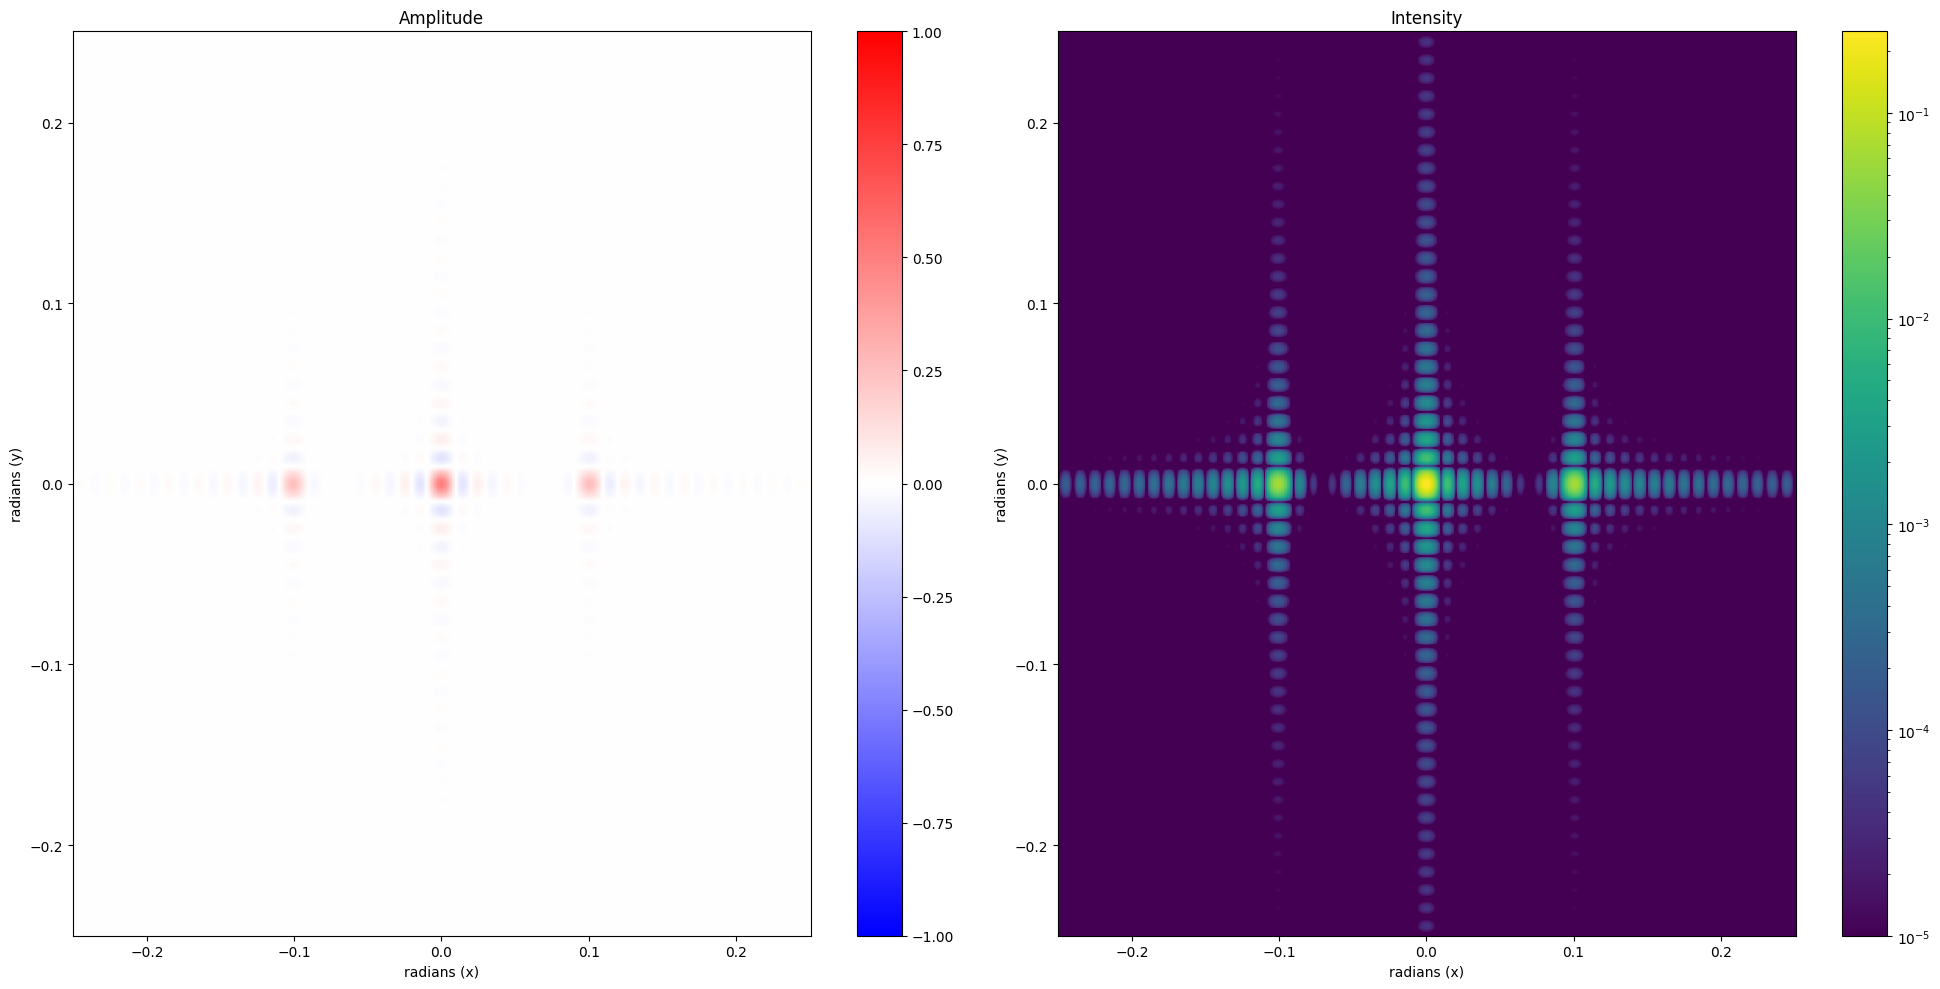

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from scipy.special import jv

m = 1
L_nu = 100
f0 = 0.1

max_angle_x = .25
max_angle_y = .25
N = 1001

d_angle_x = (max_angle_x*2)/N
d_angle_y = (max_angle_x*2)/N

x,y = np.mgrid[-max_angle_x:(max_angle_x+d_angle_x):d_angle_x, -max_angle_y:(max_angle_y+d_angle_y):d_angle_y]

A = np.zeros(x.shape)
for [a,f] in [(m/4,-f0), (1/2,0), (m/4, f0)]:
    A += a * np.sinc(L_nu*(x-f)) * np.sinc(L_nu*y)

I = np.real(A * np.conj(A))

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

im1 = axs[0].pcolormesh(x, y, A, cmap='bwr', vmin=-1, vmax=1)
axs[0].set_xlabel('radians (x)')
axs[0].set_ylabel('radians (y)')
axs[0].set_title('Amplitude')

im2 = axs[1].pcolormesh(x, y, I, norm=colors.LogNorm(vmin=1e-5, vmax=I.max()))
axs[1].set_xlabel('radians (x)')
axs[1].set_ylabel('radians (y)')
axs[1].set_title('Intensity')

fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])
fig.tight_layout()
plt.show()

## Example 2: Phase Oscillation

This is the Second example in Goodman. For the most part we will copy the first example and re-use the square aperture and convolution framework, but will change the type of diffraction grating. Instead of oscillating in amplitude, this grating will oscillate in phase.

Suppose we have a thin piece of glass whose whose front surface has been cut into the shape of a sinusoide, with thickness changing in the $z$ direction and the sinusoide repeating in the $x$ direction. Light passing through this glass will travel an extra distance $\Delta z = A \cos(2 \pi f_0 \nu_x))$, where $A$ is the amplitude of the grating and $f_0$ is the frequency of the grating in the $x$ direction. The phase offset from the sinusoidal surface is given by:

$$\Delta \phi = i n k A \cos(2 \pi f_0 \nu_x))$$

Note that Goodman uses sine instead of cosine, but I prefer cosine here to make the resulting plots symmetrical. To help simplify we can sweep all the constant phase terms into a single contant $m = n k A$. We can now write down the amplitude of the grating as follows:

$$\psi_G = \exp{ \left[ i m \cos(2 \pi f_0 \nu_x)) \right] }$$

Integrals involving nested sinusoids are tricky and typically involve Bessel Functions. In this case there's a way to re-write this exponential as an infinite sum over Bessel Functions that makes it easier to solve, known as the [Jacobi-Anger Expansion](https://en.wikipedia.org/wiki/Jacobi%E2%80%93Anger_expansion):

$$\exp{ \left[ i m \cos(2 \pi f_0 \nu_x) \right] } = \sum_{q=-\infty}^{\infty} i^q J_q(m) \exp{ \left[ 2 \pi i q f_0 \nu_x \right] }$$

Note that since we have pulled the $\cos(x)$ out of the exponent, we can run a Fourier Transform on each term individually, as they are all regular oscillations that result in Diract Deltas as in the previous example:

$$\mathcal{F} \left[ e^{2 \pi i q f_0 \nu_x} \right] = \delta(\theta_x - q f_0, \theta_y)$$

The solution is an infinite sum of Dirac Deltas, where each term has an amplitude based on the Bessel term $J_q(m)$:

$$\mathcal{F} \left[ \psi_G \right] = \sum_{q=-\infty}^{\infty} i^q J_q(m) \delta(\theta_x - q f_0, \theta_y)$$

For the final answer we can convolve this infinite sum with the sinc term from the aperture, giving an infinite sum involving sincs:

$$\mathcal{F} \left[ \psi(\theta_x, \theta_y) \right] = \sum_{q=-\infty}^{\infty} i^q J_q(m) \text{sinc}(\pi L_\nu (\theta_x - q f_0) ) \text{sinc}(\pi L_\nu \theta_y)$$

As before we can approximate the intensity by ignoring the cross-terms:

$$\mathcal{F}^2 \left[ \psi(\theta_x, \theta_y) \right] \approx \sum_{q=-\infty}^{\infty} J_q^2(m) \text{sinc}^2(\pi L_\nu (\theta_x - q f_0) ) \text{sinc}^2(\pi L_\nu \theta_y)$$

In the example below, we suppose $m=2$, $L_\nu=100$, and $f_0=.05$. This could correspond to a real-world diffraction grating where $\lambda = 500$nm, $L_\nu = 50 \mu \text{m}$, and $a = \lambda \cdot (1/f_0) = 10 \mu \text{m}$ or 100 lines/mm. Note that in the amplitude plot below, we have rotated the phase by $\pi/4$, since the even terms temporarily vanish at intervals of $\omega t = n \pi$.

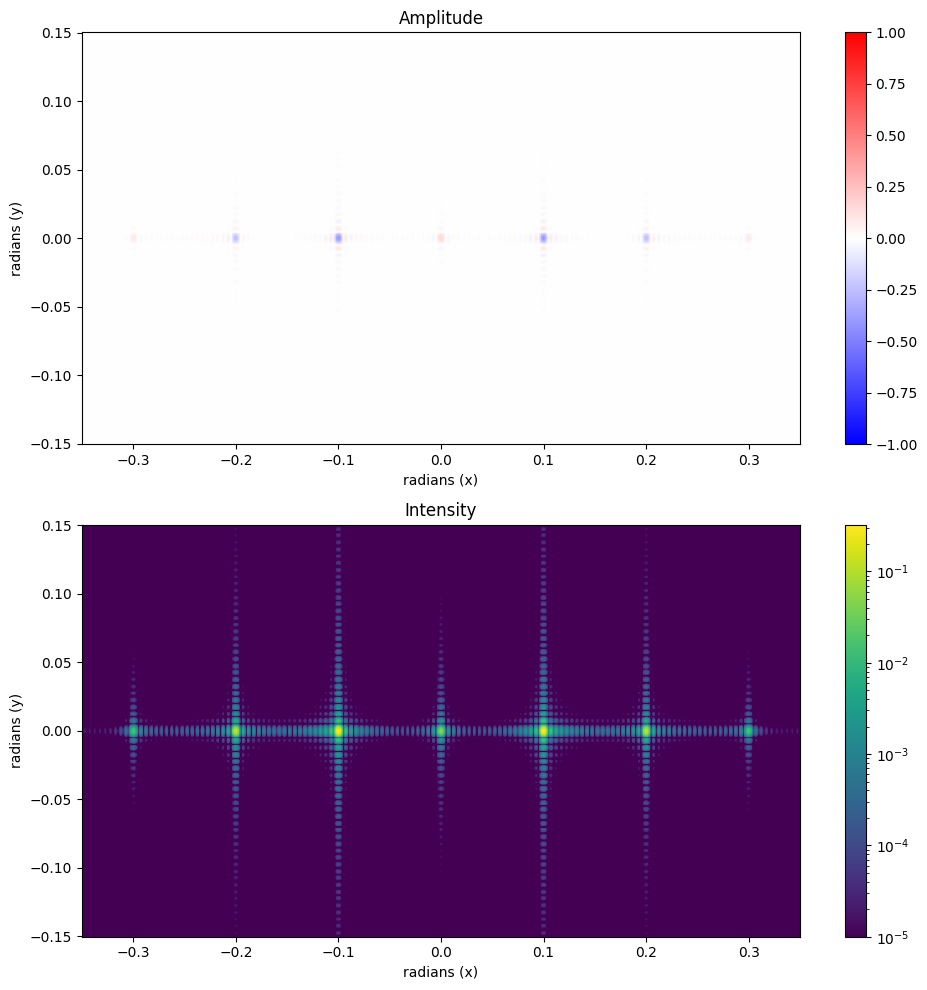

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from scipy.special import jv

m = 2
L_nu = 100
f_0 = 0.1

max_angle_x = .35
max_angle_y = .15
N = 1001

d_angle_x = (max_angle_x*2)/N
d_angle_y = (max_angle_x*2)/N

x,y = np.mgrid[-max_angle_x:(max_angle_x+d_angle_x):d_angle_x, -max_angle_y:(max_angle_y+d_angle_y):d_angle_y]

qs = list(range(-11, 12))
A = np.zeros(x.shape, dtype='complex128')
for q in qs:
    A += 1j**q * jv(q, m) * np.sinc(2*L_nu*(x-q*f_0)) * np.sinc(2*L_nu*y)

# needed to see all amplitude locations, since the real components of the odd terms are zero at the exact moment t=0
A *= (1 + 1j) / np.sqrt(2)

I = np.real(A * np.conj(A))

fig, axs = plt.subplots(2, 1, figsize=(10,10))

im1 = axs[0].pcolormesh(x, y, np.real(A), cmap='bwr', vmin=-1, vmax=1)
axs[0].set_xlabel('radians (x)')
axs[0].set_ylabel('radians (y)')
axs[0].set_title('Amplitude')

im2 = axs[1].pcolormesh(x, y, I, norm=colors.LogNorm(vmin=1e-5, vmax=I.max()))
axs[1].set_xlabel('radians (x)')
axs[1].set_ylabel('radians (y)')
axs[1].set_title('Intensity')

fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])
fig.tight_layout()
plt.show()

Note that the middle dot seems dimmer than the first couple orders in the plot above. This is due to the brightness being related to $J_q^2(m)$, and at $m=2$ it just happens to be the case that $|J_0(2)|$ is less than $|J_1(2)|$ and $|J_2(2)|$. If we plot the first few Bessel Functions we can see that they oscillate independently of each other. If we happen to pick thickness $m=nkA$ such that a particular Bessel function $J_q$ is passing through the x-axis, then the $q$th diffraction spike will disappear.

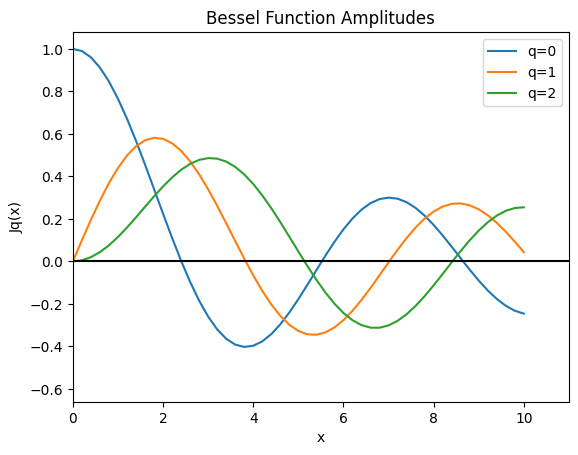

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from scipy.special import jv

x = np.linspace(-10, 10, 101)
#qs = list(range(4))
qs = [0, 1, 2]

for q in qs:
    plt.plot(x, jv(q,x))

plt.xlim(left=0)
plt.axhline(y=0, color='k')
plt.legend([f'q={q}' for q in qs], loc='upper right')
plt.title('Bessel Function Amplitudes')
plt.xlabel('x')
plt.ylabel('Jq(x)')

plt.show()

## Example 3: Multi-slit Diffraction

My guess is this is what a typical diffraction grating would look like if you bought one off the internet. This is problem 4-8 in Goodman. He uses different variable symbols than I've been using, but this is essentially the grating we're interested in:

$$\psi(\nu_x, \nu_y) = \left\{ \left[ \text{rect} \left( \frac{\nu_x}{R_X} \right) \text{rect} \left( \frac{\nu_y}{R_Y} \right) \right] \circledast \left[ \frac{1}{\Delta} \text{comb} \left( \frac{\nu_x}{\Delta} \right) \delta(\nu_y) \right] \right\} \text{rect} \left( \frac{\nu_x}{N \Delta} \right)$$

At a high-level this is a series of $R_X \times R_Y$-sized rectangles repeated $N$ times along the $x$-direction.

### The Comb Function

The $\text{comb}(x)$ function is exactly what it sounds like: an infinite number of Dirac Deltas repeated along the $x$-axis:

$$\text{comb}(x) = \sum_{n=-\infty}^{\infty} \delta(x-n)$$

What's interesting about the comb is that it is its own Fourier Transform. To prove this, we first derive an alternative expression for the comb by representing it as a Fourier Series. Because the comb is periodic with period $T=1$ it can be expressed as a Fourier Series with unknown coefficients $c_n$:

$$\text{comb}(x) = \sum_{n=-\infty}^{\infty} c_n e^{-2 \pi i n x}$$

The coefficients in a Fourier Series can be calculated with this integral:

$$c_n = \int_{-T/2}^{T/2} f(x) e^{2 \pi i n x} dx$$

When we substitute the comb, only the zeroth term contributes to each $c_n$, giving us $1$ for every term:

$$c_n = \sum_{m=-\infty}^{\infty} \int_{-1/2}^{1/2} \delta(x-m) e^{2 \pi i n x} dx = \int_{-1/2}^{1/2} \delta(x) e^{2 \pi i x} = 1$$

Therefore the following is an equivalent expression of the comb:

$$\text{comb}(x) = \sum_{n=-\infty}^{\infty} e^{- 2 \pi i n x}$$

The next step is to actually compute the Fourier Transform and show that it becomes another comb, but this time in $\nu$:

$$\mathcal{F} \left[ \text{comb}(x) \right](\nu) = \sum_{n=-\infty}^{\infty} \int_{-\infty}^{\infty} \delta(x-n) e^{-2 \pi i n x \nu} dx = \sum_{n=-\infty}^{\infty} e^{-2 \pi i n \nu}$$

But we know from earlier that this infinite sum is equal to the comb's Fourier Series, and therefore is also a comb!

$$\mathcal{F} \left[ \text{comb}(x) \right] = \text{comb}(\nu)$$

### Plotting the Amplitude Function

Note that the first term in brackets is the description of a small rectangle with bounds $R_x$ by $R_y$. By running a convolution between this function and the comb, we basically repeat that rectangle at regular intervals of $\Delta$ along the $x$-axis, creating a multi-slit aperture. The slits are bounded by the outer-most $\text{rect}$, creating a total number of $N$ slits. Note for this problem Goodman asserts that $N$ should be odd, as it will setup an interesting pattern later.

We plot an example of this function below:

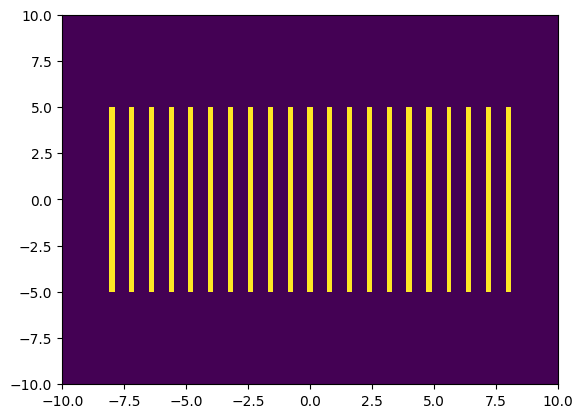

In [20]:
import matplotlib.pyplot as plt
import numpy as np

Rx = 0.2
Ry = 10
delta = 0.8
n = 21

max_v = 10
N = 1001
dv = (2*max_v) / (N-1)
epsilon = 1e-9

x,y = np.mgrid[-max_v:(max_v+epsilon):dv, -max_v:(max_v+epsilon):dv]

psi = np.zeros(x.shape)

min_n = int(-(n-1)/2)
max_n = int((n-1)/2)
for curr_n in range(min_n, max_n+1):
    center_x = curr_n * delta
    x_rect = np.logical_and(x>=center_x-Rx/2, x<=center_x+Rx/2)
    y_rect = np.logical_and(y>=-Ry/2, y<=Ry/2)
    rect = np.logical_and(x_rect, y_rect)
    psi[rect] = 1

plt.pcolormesh(x, y, psi)
plt.show()

### Solving the Fourier Transform

I found the easiest way to approach this problem was to break it into three smaller functions, Fourier Transform these individually, then use the Convolution Theorem to combine them back into the final answer. The three smaller functions include the slits, the repetition pattern, and the outer bounds:

$$\psi(\nu_x, \nu_y) = \left[ \psi_{\text{slit}} \circledast \psi_{\text{repeat}} \right] \cdot \psi_{\text{bounds}}$$

These functions are given by the following:

$$\begin{align}
\psi_{\text{slit}} &= \text{rect} \left( \frac{\nu_x}{R_X} \right) \text{rect} \left( \frac{\nu_y}{R_Y} \right) \\
\psi_{\text{repeat}} &= \frac{1}{\Delta} \text{comb} \left( \frac{\nu_x}{\Delta} \right)\delta(\theta_y) \\
\psi_{\text{bounds}} &= \text{rect} \left( \frac{\nu_x}{N \Delta} \right)
\end{align}$$

Their respective Fourier Transforms are the following:

$$\begin{align}
\mathcal{F} \left[ \psi_{\text{slit}} \right] &= R_x R_y \text{sinc}(R_x \pi \theta_x) \text{sinc}(R_y \pi \theta_y) \\
\mathcal{F} \left[ \psi_{\text{repeat}} \right] &= \frac{1}{\Delta} \text{comb} \left( \Delta \theta_x \right) \\
\mathcal{F} \left[ \psi_{\text{bounds}} \right] &= N \Delta \text{sinc}(N \Delta \theta_x) \delta(\theta_y)
\end{align}$$

Note from the Convolution Theorem, amplitudes which are multiplied have Fouriers that are convolved, and amplitudes which are convolved have Fouriers that are multiplied. This means the overall Fourier Transform is given by the following:

$$\mathcal{F} \left[ \psi(\nu_x, \nu_y) \right] = \left( \mathcal{F} \left[ \psi_{\text{slit}} \right] \cdot \mathcal{F} \left[ \psi_{\text{repeat}} \right] \right) \circledast \mathcal{F} \left[ \psi_{\text{bounds}} \right]$$

Plugging in terms:

$$\mathcal{F} \left[ \psi(\nu_x, \nu_y) \right] = \left[ R_x R_y \text{sinc}(R_x \pi \theta_x) \text{sinc}(R_y \pi \theta_y) \frac{1}{\Delta} \text{comb} \left( \Delta \theta_x \right) \right] \circledast \left[ N \Delta \text{sinc}(N \Delta \theta_x) \delta(\theta_y) \right]$$

Moving constant terms out and solving the trivial convolution in $y$ leaves just the convolution in $x$:

$$\mathcal{F} \left[ \psi(\nu_x, \nu_y) \right] = N R_x R_y \text{sinc}(R_y \pi \theta_y) \Big\{ \text{sinc}(R_x \pi \theta_x)  \text{comb} \left( \Delta \theta_x \right) \circledast \text{sinc}(N \Delta \theta_x) \Big\}$$

The $x$-only terms in brackets can be solved by writing out the comb and convolution explicitly:

$$\Big\{ \cdots \Big\} = \sum_{n=-\infty}^{\infty} \int_{-\infty}^{\infty} \text{sinc}(R_x \pi t) \delta(\Delta t - n) \text{sinc}(N \Delta (\theta_x - t)) dt$$

The Dirac Deltas solve the integrals and set $t = n / \Delta$:

$$\Big\{ \cdots \Big\} = \sum_{n=-\infty}^{\infty} \text{sinc}(R_x \pi n / \Delta) \text{sinc}(N (\Delta \theta_x - n))$$

The final answer becomes:

$$\mathcal{F} \left[ \psi(\nu_x, \nu_y) \right] = N R_x R_y \text{sinc}(R_y \pi \theta_y) \sum_{n=-\infty}^{\infty} \text{sinc}(R_x \pi n / \Delta) \text{sinc}(N (\Delta \theta_x - n))$$

### Removing the Even Terms

Just like the previous two examples, we end up with a repeated aperture diffraction pattern, where the amplitude of each pattern depends on $\text{sinc}(R_x \pi n / \Delta)$. What's interesting is the even terms can be made to vanish by making the argument to this sinc a multiple of $m \pi$. This can be done by setting $R_x / \Delta = 1/2$, or $\Delta = 2 R_x$. This happens when the rectangles take up exactly half the space.

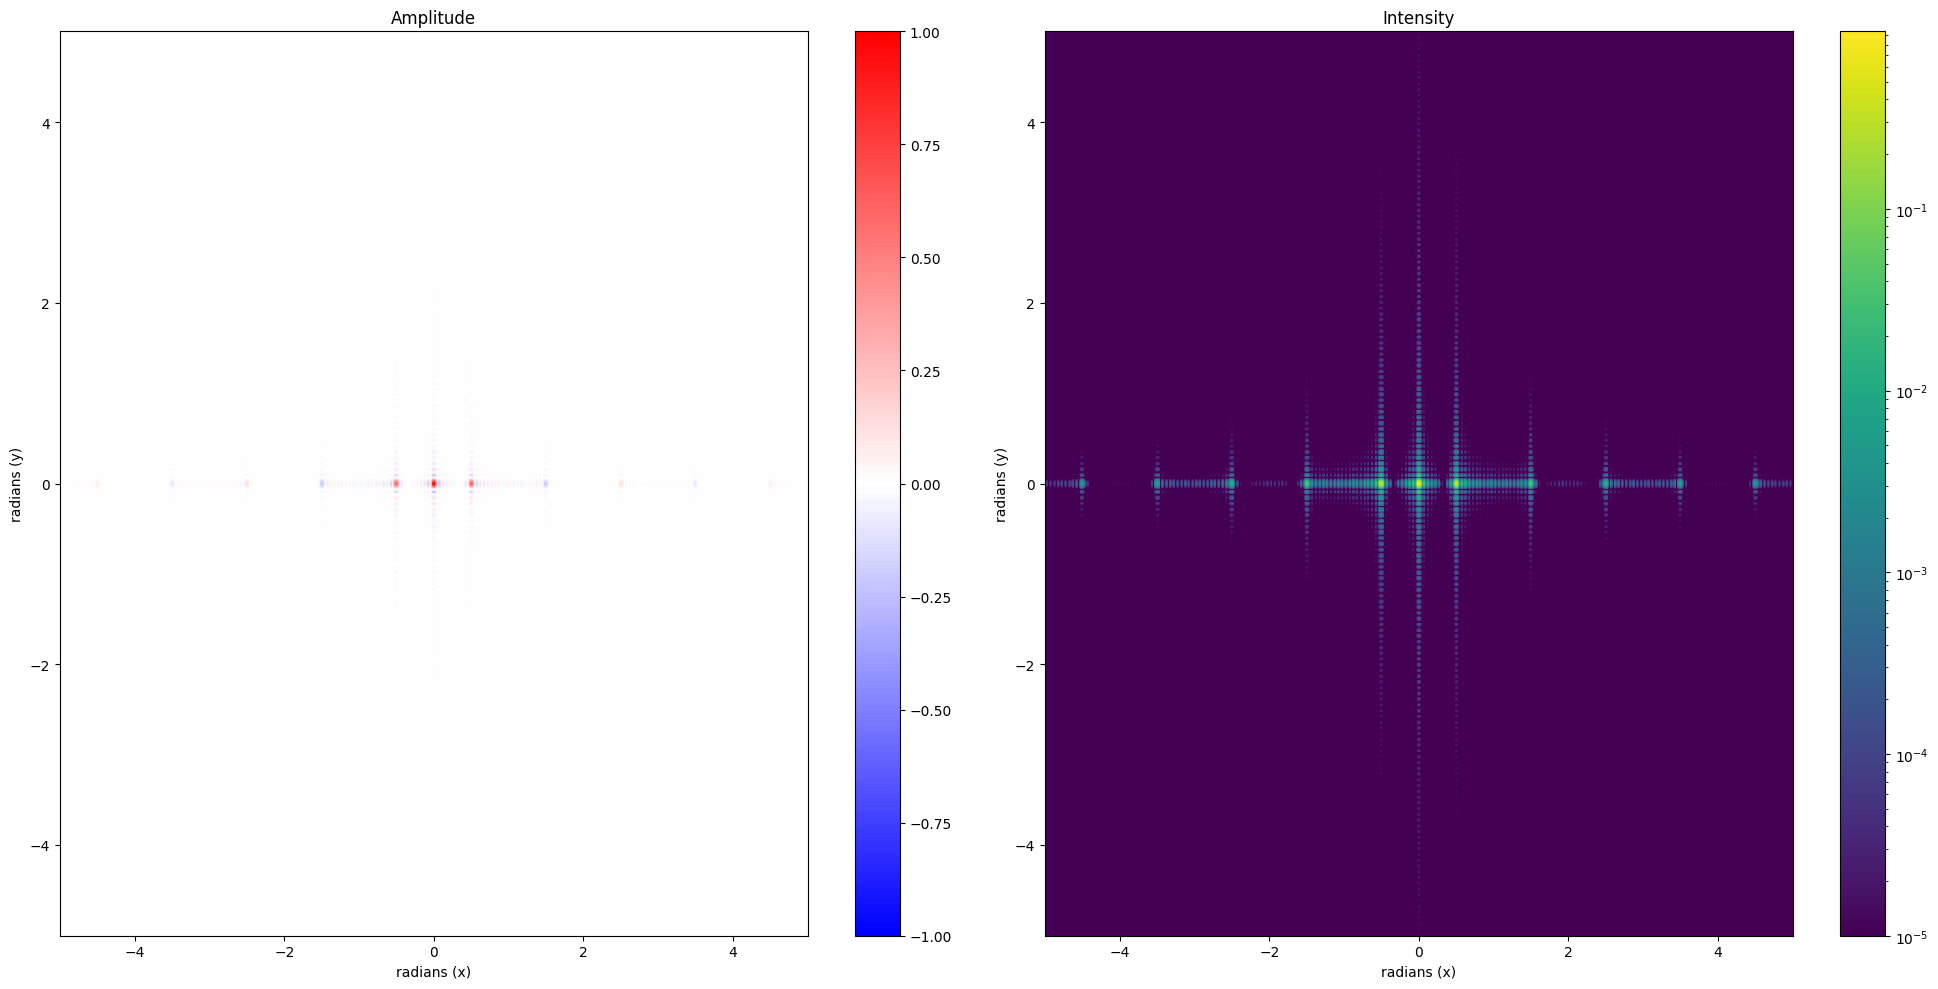

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from scipy.special import jv

Rx = 1
Ry = 5
delta = 2
n = 10

max_angle_x = 5
max_angle_y = 5
N = 1001

d_angle_x = (max_angle_x*2)/N
d_angle_y = (max_angle_x*2)/N

x,y = np.mgrid[-max_angle_x:(max_angle_x+d_angle_x):d_angle_x, -max_angle_y:(max_angle_y+d_angle_y):d_angle_y]

qs = list(range(-n-1, n+2))
A = np.zeros(x.shape)
for q in qs:
    A += np.sinc(Rx*q/delta) * np.sinc(n * (delta * x - q))

A *= np.sinc(Ry * np.pi * y)

I = np.real(A * np.conj(A))

fig, axs = plt.subplots(1, 2, figsize=(20,10))

im1 = axs[0].pcolormesh(x, y, A, cmap='bwr', vmin=-1, vmax=1)
axs[0].set_xlabel('radians (x)')
axs[0].set_ylabel('radians (y)')
axs[0].set_title('Amplitude')

im2 = axs[1].pcolormesh(x, y, I, norm=colors.LogNorm(vmin=1e-5, vmax=I.max()))
axs[1].set_xlabel('radians (x)')
axs[1].set_ylabel('radians (y)')
axs[1].set_title('Intensity')

fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])
fig.tight_layout()
plt.show()